0.10005000833333409
0.11031211282307443
0.4308253751833024
2.295013682949731


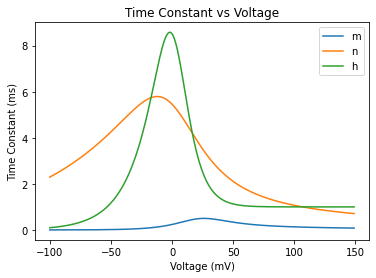

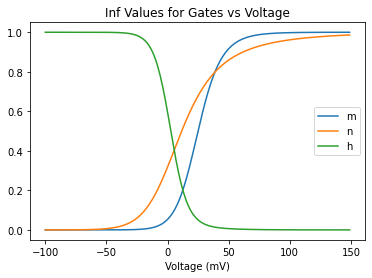

In [64]:
#QUESTION 1
import matplotlib.pyplot as plt
import numpy as np 
import math

# Functions to calculate alpha and beta for each ion at a given voltage
def alpha_m(V):
  if (V == 25):
    return alpha_m(V+.01)
  return 0.1*(25-V)/(math.exp((25 - V)/10)-1)
def beta_m(V): 
  return 4*math.exp(-1*V/18)
def alpha_h(V):
  return 0.07*math.exp(-1*V/20)
def beta_h(V):
  if (V == 3):
    return beta_h(V+0.01)
  return 1/(math.exp((30-V)/10)+1)
def alpha_n(V):
  if (V == 10):
    return alpha_n(V+0.01)
  return (0.01*(10-V))/(math.exp((10-V)/10)-1)
def beta_n(V):
  return 0.125*math.exp(-1*V/80)

# Create arrays for voltage, alpha for each ion, and beta for each ion 
voltages = np.arange(-100, 150, 1) # intervals of 1 mV at a time

# Get alpha_m for V = 0
n_alpha = alpha_n(0)
print(alpha_n(10))
print(beta_n(10))
print(alpha_m(10))
print(beta_m(10))

# Functions to calculate time constant and inf-value for a given alpha and beta
def get_tau(a, b):
  return 1/(a+b)
def get_inf(a, b):
  return a/(a+b)
# Calculate time constant and inf value for each ion 
tau_m = []; tau_h = []; tau_n = [];
inf_m = []; inf_h = []; inf_n = [];
for i in range(0, len(voltages)):
  V = voltages[i]
  tau_m.append(get_tau(alpha_m(V), beta_m(V)))
  tau_n.append(get_tau(alpha_n(V), beta_n(V)))
  tau_h.append(get_tau(alpha_h(V), beta_h(V)))
  inf_m.append(get_inf(alpha_m(V), beta_m(V)))
  inf_n.append(get_inf(alpha_n(V), beta_n(V)))
  inf_h.append(get_inf(alpha_h(V), beta_h(V)))

plt.figure()
plt.plot(voltages, tau_m)
plt.plot(voltages, tau_n)
plt.plot(voltages, tau_h)
plt.title("Time Constant vs Voltage")
plt.xlabel("Voltage (mV)")
plt.ylabel("Time Constant (ms)")
plt.legend(["m", "n", "h"])

plt.figure()
plt.plot(voltages, inf_m)
plt.plot(voltages, inf_n)
plt.plot(voltages, inf_h)
plt.title("Inf Values for Gates vs Voltage")
plt.xlabel("Voltage (mV)")
plt.legend(["m", "n", "h"])

Based on these plots, we can see that m has the lowest time constant given any voltage condition. Therefore, m changes the fastest in response to a voltage change. As V increases, m-gates and n-gates will become more open while h-gates will become more closed. 

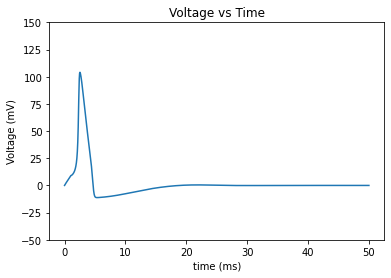

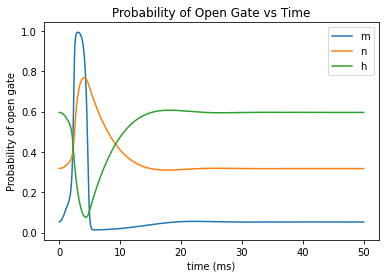

In [65]:
# QUESTION 2
C = 1
gk_max = 36; gna_max = 120; gl_max = 0.3;
Ek = -12; Ena = 115; El = 10.6;
# Functions that return the value of a derivative 
def V_prime(i, current):
  I = 0
  if (i < 1000):
    I = current
  return (1/C)*(gna_max*m[i-1]**3*h[i-1]*(Ena-V[i-1])+gk_max*n[i-1]**4*(Ek-V[i-1])+gl_max*(El-V[i-1])+I)
def m_prime(i):
  return alpha_m(V[i-1])*(1-m[i-1])-beta_m(V[i-1])*m[i-1]
def n_prime(i): 
  return alpha_n(V[i-1])*(1-n[i-1])-beta_n(V[i-1])*n[i-1]
def h_prime(i):
  return alpha_h(V[i-1])*(1-h[i-1])-beta_h(V[i-1])*h[i-1]
time = np.arange(0, 50, .001)
V = []; V.append(0)
m = []; m.append(.053)
n = []; n.append(.318)
h = []; h.append(.596)
for i in range(1, len(time)):
  t = time[i]
  V.append(V[i-1]+0.001*V_prime(i, 10))
  m.append(m[i-1]+0.001*m_prime(i))
  n.append(n[i-1]+0.001*n_prime(i))
  h.append(h[i-1]+0.001*h_prime(i))
  
plt.figure()
plt.title("Voltage vs Time")
plt.xlabel("time (ms)")
plt.ylabel("Voltage (mV)")
plt.plot(time, V)
plt.ylim([-50, 150])
plt.figure()
plt.title("Probability of Open Gate vs Time")
plt.xlabel("time (ms)")
plt.ylabel("Probability of open gate")
plt.plot(time, m)
plt.plot(time, n)
plt.plot(time, h)
plt.legend(["m", "n", "h"])

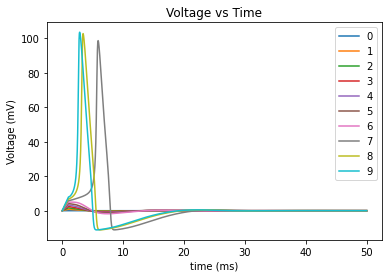

In [66]:
# QUESTION 3
currents = np.arange(0, 10, 1)
plt.figure()
plt.title("Voltage vs Time")
plt.xlabel("time (ms)")
plt.ylabel("Voltage (mV)")

for i in range(0, len(currents)):
  curr = currents[i]
  time = np.arange(0, 50, .001)
  V = []; V.append(0)
  m = []; m.append(.053)
  n = []; n.append(.318)
  h = []; h.append(.596)
  for i in range(1, len(time)):
    t = time[i]
    V.append(V[i-1]+0.001*V_prime(i, curr))
    m.append(m[i-1]+0.001*m_prime(i))
    n.append(n[i-1]+0.001*n_prime(i))
    h.append(h[i-1]+0.001*h_prime(i))

  plt.plot(time, V)
plt.legend(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

We can see that 7 mA, 8 mA, and 9 mA all trigger action potentials but 6 mA does not trigger an action potential, so the threshold is somewhere between 6 mA and 7 mA. Let's look into which values between 6 mA and 7 mA can trigger an action potential.

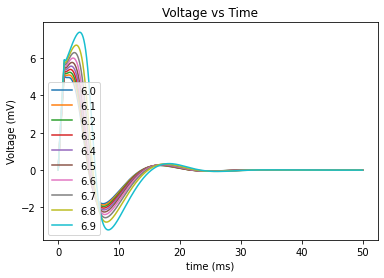

In [67]:
currents = np.arange(6, 7, .1)
plt.figure()
plt.title("Voltage vs Time")
plt.xlabel("time (ms)")
plt.ylabel("Voltage (mV)")

for i in range(0, len(currents)):
  curr = currents[i]
  time = np.arange(0, 50, .001)
  V = []; V.append(0)
  m = []; m.append(.053)
  n = []; n.append(.318)
  h = []; h.append(.596)
  for i in range(1, len(time)):
    t = time[i]
    V.append(V[i-1]+0.001*V_prime(i, curr))
    m.append(m[i-1]+0.001*m_prime(i))
    n.append(n[i-1]+0.001*n_prime(i))
    h.append(h[i-1]+0.001*h_prime(i))

  plt.plot(time, V)
plt.legend(["6.0", "6.1", "6.2", "6.3", "6.4", "6.5", "6.6", "6.7", "6.8", "6.9"])

We can see that 6.6 mA triggers an action potential but 6.5 mA does not trigger an action potential, so it requires at least approzimately 6.6 mA to trigger an action potential.

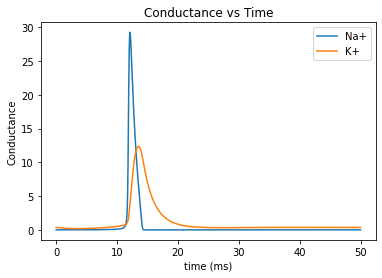

In [68]:
# QUESTION 4
V = []; V.append(0)
m = []; m.append(.053)
n = []; n.append(.318)
h = []; h.append(.596)
for i in range(1, len(time)):
  t = time[i]
  V.append(V[i-1]+0.001*V_prime(i, -20))
  m.append(m[i-1]+0.001*m_prime(i))
  n.append(n[i-1]+0.001*n_prime(i))
  h.append(h[i-1]+0.001*h_prime(i))
# Plot the conductances
g_na = []
g_k = []
for i in range(0, len(time)):
  g_na.append(gna_max*(m[i]**3)*h[i])
  g_k.append(gk_max*n[i]**4)
plt.plot(time, g_na)
plt.plot(time,g_k)
plt.title("Conductance vs Time")
plt.xlabel("time (ms)")
plt.ylabel("Conductance")
plt.legend(["Na+", "K+"])

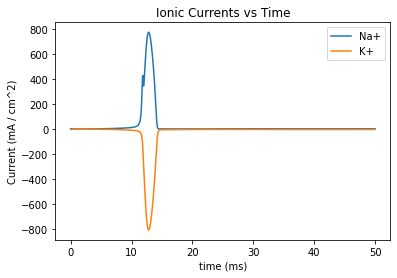

In [69]:
# QUESTION 5
# Plot each ionic current

I_na = []
I_k = []
for i in range(0, len(time)):
  I_na.append(g_na[i]*(Ena-V[i]))
  I_k.append(g_k[i]*(Ek-V[i]))
plt.figure()
plt.plot(time, I_na)
plt.plot(time, I_k)
plt.title("Ionic Currents vs Time")
plt.xlabel("time (ms)")
plt.ylabel("Current (mA / cm^2)")
plt.legend(["Na+", "K+"])

The small notch on the Na curve occurs around the 3 or 4 second mark. If we look at the graph from Question 2 for Voltage vs Time, we see that the peak of the voltage occurs at approximately the same time mark. I think the reason there is a notch in the Na curve at this time because the voltage has reached a threshold where h-gates are closing at a very fast rate compared to how fast the m-gates are opening. Therefore, this time represents when the voltage becomes high enough to trigger the h-gates to start closing fast enough to deactive the Na channels overall. Thus, there will be a momentary decrease in the current through the sodium channels. However, this decrease in current does not last permanently because even though the Na channels are less active due to increasingly closed h-gates, the probability of n-gates still being open will be increasing, allowing K to leave the cell still. This will lower the voltage enough so that the h-gates can become more open again thereby increasing the Na channel current once again. 

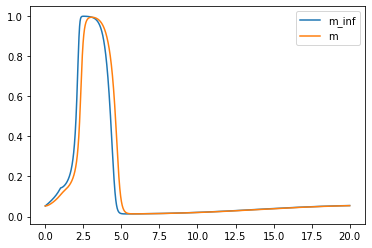

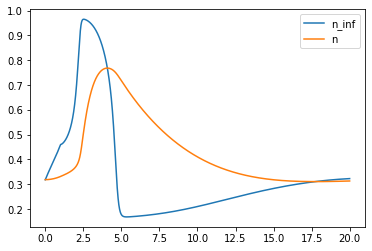

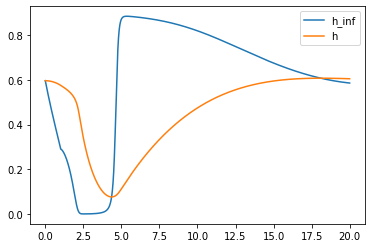

In [70]:
# QUESTION 6
time = np.arange(0, 20, .001)
V = []; V.append(0)
m = []; m.append(.053)
n = []; n.append(.318)
h = []; h.append(.596)
for i in range(1, len(time)):
  t = time[i]
  V.append(V[i-1]+0.001*V_prime(i, 10))
  m.append(m[i-1]+0.001*m_prime(i))
  n.append(n[i-1]+0.001*n_prime(i))
  h.append(h[i-1]+0.001*h_prime(i))
# Generate the steady state values for each of the gates with respect to time
m_steady = []
n_steady = []
h_steady = []
for i in range(0, len(time)):
  v = V[i]
  m_steady.append(get_inf(alpha_m(v), beta_m(v)))
  n_steady.append(get_inf(alpha_n(v), beta_n(v)))
  h_steady.append(get_inf(alpha_h(v), beta_h(v)))
plt.figure()
plt.plot(time, m_steady)
plt.plot(time, m)
plt.legend(["m_inf", "m"])
plt.figure()
plt.plot(time, n_steady)
plt.plot(time, n)
plt.legend(["n_inf", "n"])
plt.figure()
plt.plot(time, h_steady)
plt.plot(time, h)
plt.legend(["h_inf", "h"])

The reason m looks so close to m_inf is because the time constant for the m-gate dynamics is very low relative to the time constants for the n-gates and h-gates. Therefore, the m-gates do not require as much time to approach their steady state and the proportion of m-gates open at a given time during our simulation will closely resemble their steady state if they were held at each given voltage that is encountered in the simulation. The n-gates and h-gates do not follow their steady state curves as closely because they have higher time constants, so they do not respond as quickly as the m-gates to changes in voltage.



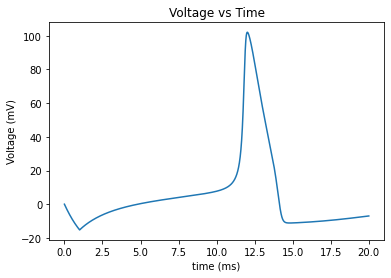

In [71]:
# QUESTION 7
# Repeat Question 2 but with an input of -20 mA
V = []; V.append(0)
m = []; m.append(.053)
n = []; n.append(.318)
h = []; h.append(.596)
for i in range(1, len(time)):
  t = time[i]
  V.append(V[i-1]+0.001*V_prime(i, -20))
  m.append(m[i-1]+0.001*m_prime(i))
  n.append(n[i-1]+0.001*n_prime(i))
  h.append(h[i-1]+0.001*h_prime(i))
  
plt.figure()
plt.title("Voltage vs Time")
plt.xlabel("time (ms)")
plt.ylabel("Voltage (mV)")
plt.plot(time, V)

The voltage keeps rising after the action stimulus is gone. When the stimulus decreases the voltages, the h-gates becomes more open, increasing the activation of the Na channels. The more active Na channels let more Na into the cell, thereby increasing the voltage even more, which makes the m-gates more open, operating on positive feedback as the m-gates are very faster to respond in the increase in voltage compared to the h-gates which are relatively slower to close as the voltage is increasing. Once the m-gates are more open, then the voltage can rise even more, causing the voltage to eventually be high enough to trigger an action potential. 

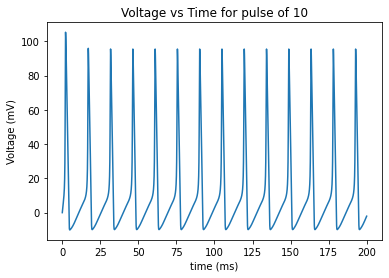

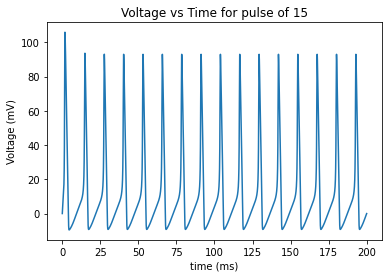

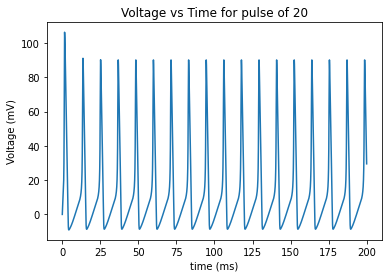

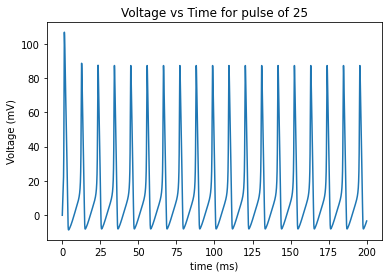

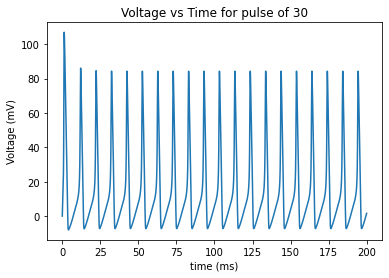

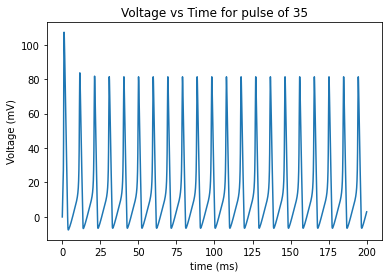

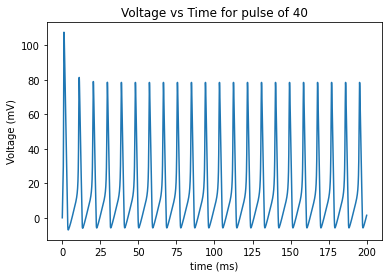

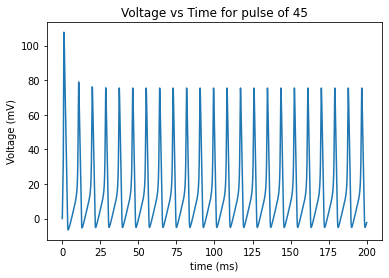

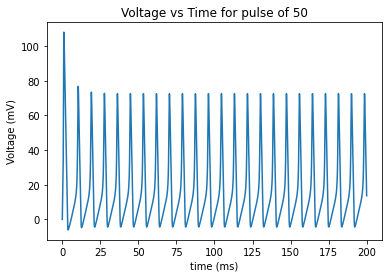

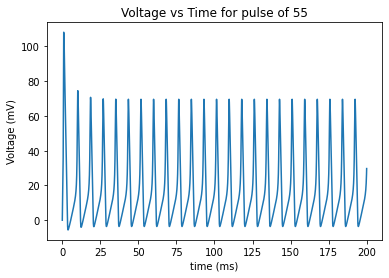

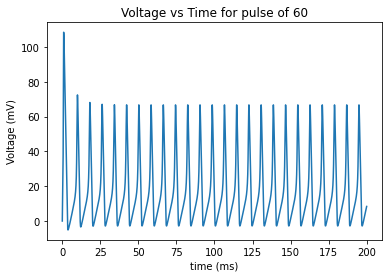

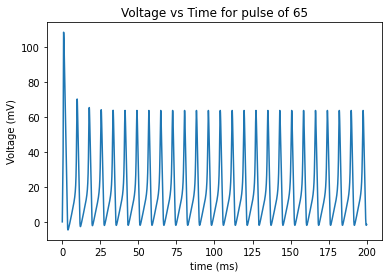

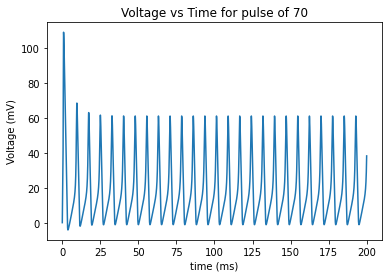

In [77]:
# QUESTION 8
def V_prime(i, current):
  I = 0
  if (i < 200000):
    I = current
  return (1/C)*(gna_max*m[i-1]**3*h[i-1]*(Ena-V[i-1])+gk_max*n[i-1]**4*(Ek-V[i-1])+gl_max*(El-V[i-1])+I)

time = np.arange(0, 200, .001)

pulse_vals = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
for p in range(0, len(pulse_vals)):
  V = []; V.append(0)
  m = []; m.append(.053)
  n = []; n.append(.318)
  h = []; h.append(.596)
  curr = pulse_vals[p]
  for i in range(1, len(time)):
    t = time[i]
    V.append(V[i-1]+0.001*V_prime(i, curr))
    m.append(m[i-1]+0.001*m_prime(i))
    n.append(n[i-1]+0.001*n_prime(i))
    h.append(h[i-1]+0.001*h_prime(i))
    
  plt.figure()
  plt.title("Voltage vs Time for pulse of " + str(curr))
  plt.xlabel("time (ms)")
  plt.ylabel("Voltage (mV)")
  plt.plot(time, V)


Text(0, 0.5, 'Time Interval between Action Potentials (ms)')

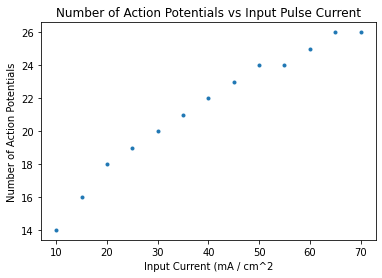

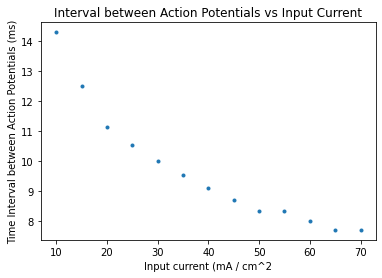

In [79]:
num_potentials = [14, 16, 18, 19, 20, 21, 22, 23, 24, 24, 25, 26, 26]
plt.figure()
plt.plot(pulse_vals, num_potentials, ".")
plt.title("Number of Action Potentials vs Input Pulse Current")
plt.xlabel("Input Current (mA / cm^2")
plt.ylabel("Number of Action Potentials")
interval_vals = []
for i in range(0, len(num_potentials)):
  interval_vals.append(200 / num_potentials[i])

plt.figure()
plt.plot(pulse_vals, interval_vals, ".")
plt.title("Interval between Action Potentials vs Input Current")
plt.xlabel("Input current (mA / cm^2")
plt.ylabel("Time Interval between Action Potentials (ms)")

We can see from the above graphs that as the impulse current increases, the number of action potentials that occurs within the 200 second time interval generally increases. However, the rate at which the firing rate increases decreases with respect to the increases in current input. Also, we can see that the refractory period decreases as input current increases. However, the rate at which the interval decreases is less steep with respect to the increases in current input. 

However, if we were to keep going with increasing the input current, we would eventually reach a lower limit to the interval between action potentials, and that value would represent the time of the absolute refractory period. 